# **Data Analysis Project**
#### By. Eunbee Chu

## ***Introduction***

With the strong interest in the Data Science field, this project is intended to observe the distribution of salaries in Data Science jobs depending on attributes listed in dataset and to identify trends.




## ***Summary***



https://docs.google.com/document/d/1BlZTb3kjR8FXJh_LL-x3Ib9OjKMmqbnhG4prg8HKej4/edit?usp=sharing

## ***Data Cleaning***

https://docs.google.com/document/d/1t6qkQJRq4X55--vrYrV1l8WpsEn3d1tEr66ES-Mba0I/edit?usp=sharing

## ***Preparation***

Before we begin, let's load the dataset first. The original dataset is called "ds_salaries.csv" and the data is from Kaggle. This data explores the salaries of different data science fields in the data science domain. The source is (https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023).

However, we're going to used the cleaned data instead of the original one. The file name is "ds_salaries - cleaned.csv" and can be downloaded from the canvas submission page.

In [153]:
salarydata = read.csv("ds_salaries - cleaned.csv")

Then we're going to load packages needed for the analysis.

In [154]:
library(tidyverse)

In [155]:
library(ggplot2)

In [156]:
library(dplyr)

In [157]:
library(tidyr)

In [158]:
head(salarydata)

,work_year,experience_level,job_title,salary,salary_currency,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2023,SE,Principal Data Scientist,80000,EUR,FT,85847,ES,100,ES,L
2,2023,MI,ML Engineer,30000,USD,CT,30000,US,100,US,S
3,2023,MI,ML Engineer,25500,USD,CT,25500,US,100,US,S
4,2023,SE,Data Scientist,175000,USD,FT,175000,CA,100,CA,M
5,2023,SE,Data Scientist,120000,USD,FT,120000,CA,100,CA,M
6,2023,SE,Applied Scientist,222200,USD,FT,222200,US,0,US,L


## ***Analysis & Discussion***

### **Experience Level**

In [159]:
salarydata %>%
  group_by(experience_level) %>%
  summarize(
    Mean_Salary = mean(salary_in_usd),
    Median_Salary = median(salary_in_usd))

experience_level,Mean_Salary,Median_Salary
<chr>,<dbl>,<dbl>
EN,80145.56,71907
EX,194930.93,196000
MI,105097.38,100000
SE,153295.46,146115


The chart above is the mean and median salary based on one’s experience level.

The experience levels include EN - Entry level, MI - Mid/Intermediate level, SE - Senior, EX - Executive level.


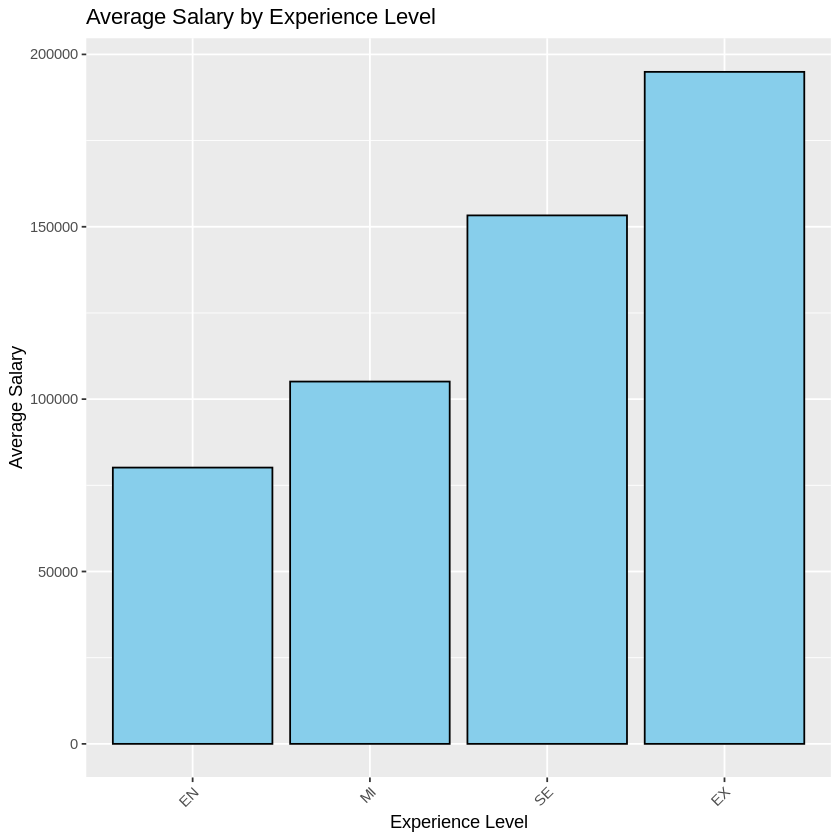

In [160]:
salarydata$experience_level <- factor(salarydata$experience_level, levels = c("EN", "MI", "SE", "EX"))
avg_salary_by_level <- salarydata %>%
  group_by(experience_level) %>%
  summarise(Avg_Salary = mean(salary_in_usd))

ggplot(avg_salary_by_level, aes(x = experience_level, y = Avg_Salary)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Experience Level", y = "Average Salary", title = "Average Salary by Experience Level") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The above is the bar chart that shows the visualization of average salaries by experience levels.

As expected, the mean and median salary increases when it gets to the executive level and decreases when it gets to the entry level.

#### **Is there a point of diminishing returns regarding salary increase with more experience?**

This question explores whether there's a limit or saturation point where the increase in salary slows down as an individual gains more experience in the data science field. As an individual who hopes to work in the data science field for a long time by gaining more experience, I’d like to know if there’s a point of diminishing returns regarding salary increase with more experience.

I can calculate this by running a linear regression by dummy coding experience level. I would dummy code three experience level out of four to set the remaining one as a baseline.


In [161]:
salarydata <- salarydata %>%
  mutate(
    is_mid = ifelse(experience_level == "MI", 1, 0),
    is_senior = ifelse(experience_level == "SE", 1, 0),
    is_executive = ifelse(experience_level == "EX", 1, 0)
  )

My baseline is **EN (Entry Level)**, and below is the regression result.

In [163]:
lm_model <- lm(salary_in_usd ~ is_mid + is_senior + is_executive, data = salarydata)
summary(lm_model)


Call:
lm(formula = salary_in_usd ~ is_mid + is_senior + is_executive, 
    data = salarydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-179931  -38295   -6096   32605  344903 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     80146       3177  25.224  < 2e-16 ***
is_mid          24952       3748   6.658 3.18e-11 ***
is_senior       73150       3370  21.709  < 2e-16 ***
is_executive   114785       6149  18.666  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56210 on 3734 degrees of freedom
Multiple R-squared:  0.1957,	Adjusted R-squared:  0.195 
F-statistic: 302.8 on 3 and 3734 DF,  p-value: < 2.2e-16


P-value is less than 0.05, meaning there’s a significant relationship between salary and experience level.

The coefficients for 'is_mid', 'is_senior', and 'is_executive' indicate the average change in salary compared to the reference level.

A positive coefficient indicates an increase in salary relative to the reference category.



> *Incremental Change*


To examine if there's a point of diminishing returns, we evaluate the coefficient values for each experience level dummy variable ('is_mid', 'is_senior', 'is_executive').

Here, I would examine the incremental change in salary from 'Mid' to 'Senior' and 'Senior' to 'Executive'. A significant drop in the incremental increase could indicate diminishing returns.

Incremental change in salary from 'Mid' to 'Senior' is 48,198, 'Senior' to 'Executive' is 41,635. While there is not a significant drop, **there’s a diminishing return** when it goes from Senior to Executive as there is a *drop* in the incremental increase from **‘Senior’ to ‘Executive’**.


### **Job Title**



In [164]:
job_title_frequency <- table(salarydata$job_title)
job_title_df <- as.data.frame(job_title_frequency)
sorted_job_titles <- job_title_df[order(-job_title_df$Freq), ]
top_three_job_titles <- head(sorted_job_titles, 3)
print(top_three_job_titles)

             Var1 Freq
34  Data Engineer 1037
48 Data Scientist  836
26   Data Analyst  610


The top three frequent jobs in this dataset are **data engineer**, **data scientist** and **data analyst**.

I’d like to see: most frequent working location, mean salary based on experience & employment type within each three job titles.



> **The most frequent working location**




In [165]:
top_jobs_data <- salarydata %>%
  filter(job_title %in% c("Data Engineer", "Data Scientist", "Data Analyst"))

In [166]:
most_frequent_location <- top_jobs_data %>%
  group_by(job_title) %>%
  summarise(Most_Frequent_Location = names(which.max(table(company_location))))

In [167]:
print(most_frequent_location)

# A tibble: 3 × 2
  job_title      Most_Frequent_Location
  <chr>          <chr>                 
1 Data Analyst   US                    
2 Data Engineer  US                    
3 Data Scientist US                    


The most frequent working location for all three job titles is the U.S.

> **Mean salary based on experience & employment type for each job title: Data Engineer, Data Scientist and Data Analyst**

In [168]:
# Filter data for the specified job titles
specific_jobs_data <- salarydata %>%
  filter(job_title %in% c("Data Engineer", "Data Scientist", "Data Analyst"))

# Calculate mean salary for each job title, experience level, and employment type
mean_salary_by_job <- specific_jobs_data %>%
  group_by(job_title, experience_level, employment_type) %>%
  summarise(Mean_Salary = mean(salary_in_usd))

# Display the mean salary for each job title, experience level, and employment type
print(mean_salary_by_job)

`summarise()` has grouped output by 'job_title', 'experience_level'. You can
override using the `.groups` argument.


# A tibble: 18 × 4
# Groups:   job_title, experience_level [12]
   job_title      experience_level employment_type Mean_Salary
   <chr>          <fct>            <chr>                 <dbl>
 1 Data Analyst   EN               FT                   62253.
 2 Data Analyst   EN               PT                   42615.
 3 Data Analyst   MI               FT                  102094.
 4 Data Analyst   SE               CT                   90000 
 5 Data Analyst   SE               FT                  120009.
 6 Data Analyst   EX               FT                  120000 
 7 Data Engineer  EN               FT                   91527.
 8 Data Engineer  MI               FL                   20000 
 9 Data Engineer  MI               FT                  107775.
10 Data Engineer  MI               PT                   61137 
11 Data Engineer  SE               FT                  153389.
12 Data Engineer  EX               FT                  209921.
13 Data Scientist EN               FT                 

In [169]:
pivot_mean_salary <- pivot_wider(mean_salary_by_job, names_from = experience_level, values_from = Mean_Salary)
print(pivot_mean_salary)

# A tibble: 9 × 6
# Groups:   job_title [3]
  job_title      employment_type     EN      MI      SE      EX
  <chr>          <chr>            <dbl>   <dbl>   <dbl>   <dbl>
1 Data Analyst   FT              62253. 102094. 120009. 120000 
2 Data Analyst   PT              42615.     NA      NA      NA 
3 Data Analyst   CT                 NA      NA   90000      NA 
4 Data Engineer  FT              91527. 107775. 153389. 209921.
5 Data Engineer  FL                 NA   20000      NA      NA 
6 Data Engineer  PT                 NA   61137      NA      NA 
7 Data Scientist FT              73918.  94463. 159591. 180646.
8 Data Scientist PT              77223      NA      NA      NA 
9 Data Scientist FL                 NA  100000      NA      NA 


The above result is the mean salary filtered out by experience level and employment type for Data Analyst, Data Engineer and Data Scientist roles.

One employment type is missing from each job title; Data Analyst is missing **FL (Freelancers)**, Data Engineer and Data Scientist is missing **CT (Contract)**.

$x
[1] "Employment Type"

$y
[1] "Mean Salary"

$title
[1] "Mean Salary by Job Title, Experience Level, and Employment Type"

attr(,"class")
[1] "labels"

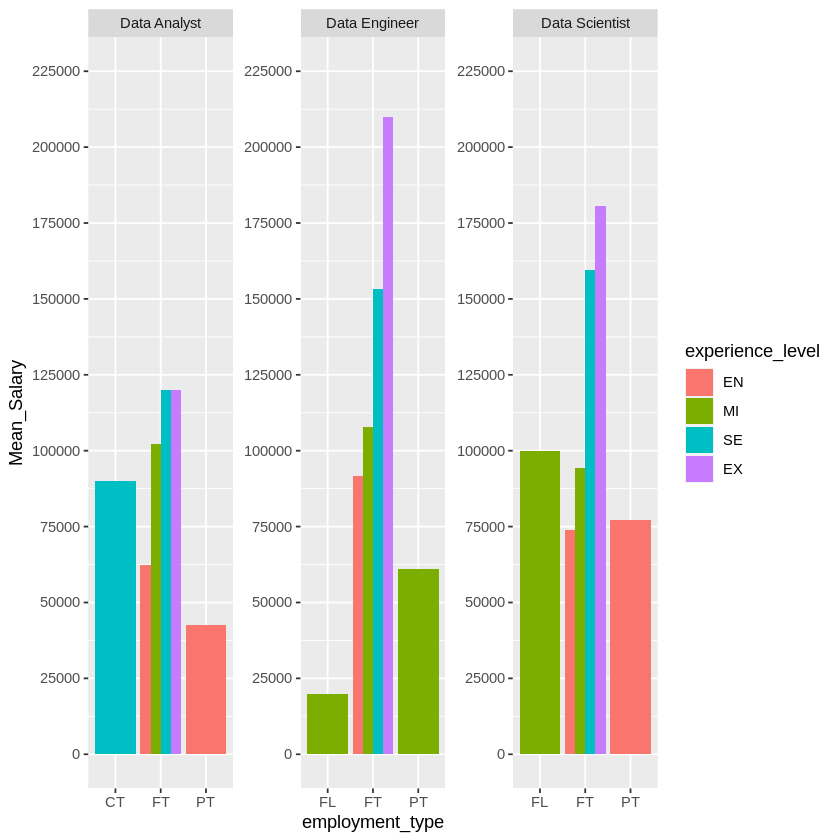

In [170]:
ggplot(mean_salary_by_job, aes(x = employment_type, y = Mean_Salary, fill = experience_level)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~job_title, scales = "free") +
  scale_y_continuous(breaks = seq(0, 225000, by = 25000), limits = c(0, 225000))
  labs(x = "Employment Type", y = "Mean Salary", title = "Mean Salary by Job Title, Experience Level, and Employment Type")

To make it more visual, this bar chart depicts the result of the pivot table above.

We can know from this bar chart that **Full-Time Data Engineers** earn the **highest** average salary on all experience levels compared to other two job titles.

*Interestingly*, between part time mid-level data engineers and part time entry-level data scientists, data scientists earn higher than the data engineers. When it comes to freelancers, we can see that mid-level data scientists earn way higher than mid-level data engineers.

### **Remote Ratio**

Now, I would like to examine the relationship between remote work ratio and salary.

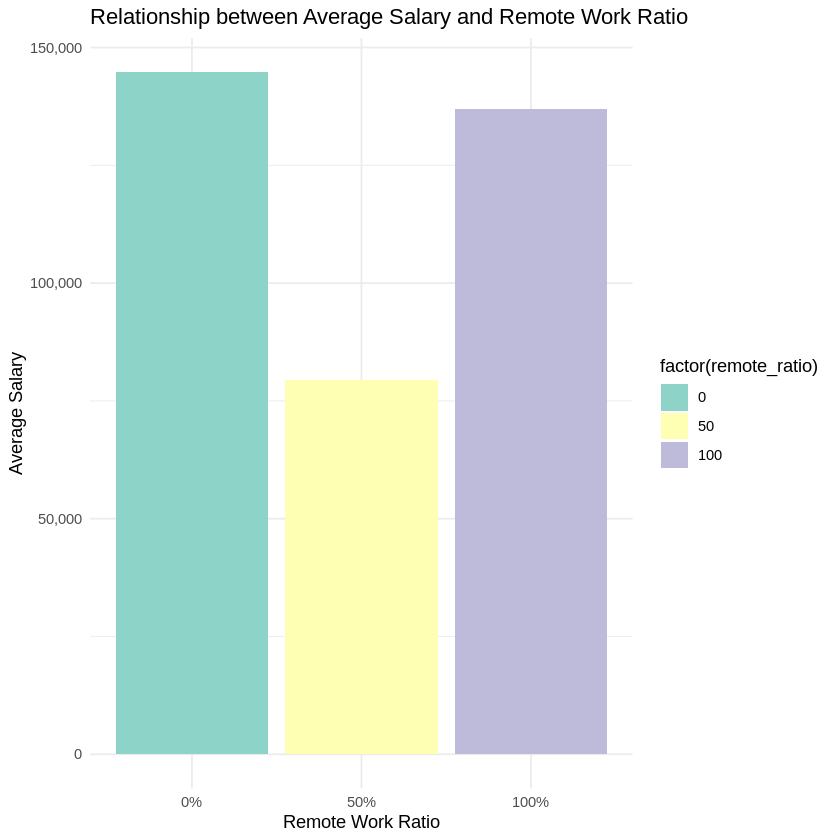

In [171]:
ggplot(salarydata, aes(x = factor(remote_ratio), y = salary_in_usd, fill = factor(remote_ratio))) +
  stat_summary(fun = "mean", geom = "bar", position = "dodge") +
  labs(title = "Relationship between Average Salary and Remote Work Ratio",
       x = "Remote Work Ratio",
       y = "Average Salary") +
  scale_x_discrete(labels = c("0" = "0%", "50" = "50%", "100" = "100%")) +
  scale_y_continuous(labels = scales::comma) +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal()

This group bar chart shows the relationship between average salary and remote work ratio.

This shows an interesting result as the average salary of the remote ratio of **50%** is the **lowest** out of all remote ratios (0%, 50%, 100%).

I set up one possibility as due to the data size difference between the percentage levels and having more part time ratio in remote percentage of 50%.


> **Data size**



In [172]:
count_remote_ratio_50 <- sum(salarydata$remote_ratio == 50)
print(count_remote_ratio_50)

[1] 186


In [173]:
count_remote_ratio_0 <- sum(salarydata$remote_ratio == 0)
print(count_remote_ratio_0)

[1] 1917


In [174]:
count_remote_ratio_100 <- sum(salarydata$remote_ratio == 100)
print(count_remote_ratio_100)

[1] 1635


Remote ratio of 50% has the lowest amount of data.

> **Employment Type Ratio**

In [175]:
subset_50_remote <- subset(salarydata, remote_ratio == 50)
employment_counts_50_remote <- table(subset_50_remote$employment_type)
print(employment_counts_50_remote)


 CT  FL  FT  PT 
  1   4 173   8 


In [176]:
subset_0_remote <- subset(salarydata, remote_ratio == 0)
employment_counts_0_remote <- table(subset_0_remote$employment_type)
print(employment_counts_0_remote)


  FL   FT 
   1 1916 


In [177]:
subset_100_remote <- subset(salarydata, remote_ratio == 100)
employment_counts_100_remote <- table(subset_100_remote$employment_type)
print(employment_counts_100_remote)


  CT   FL   FT   PT 
   9    5 1612    9 


In [178]:
FTratio50 = 173/186
FTratio0 = 1916/1917
FTratio100 = 1612/1635
print(FTratio50)
print(FTratio0)
print(FTratio100)

[1] 0.9301075
[1] 0.9994784
[1] 0.9859327


Full-time ratio of 50% remote ratio is the lowest: 0.93.

This leaves a possibility on why average salary is the lowest out of all remote ratios. At the same time, it leaves us possibility of remote work ratio of 50% in general earns less than fully remote and in-person job.

### **Company Location**




I'd like to know how company location influence salaries.

I'm going to conduct this by finding three highest vs. lowest paying countries for full-time jobs. For this analysis, I'm planning to collect data for each country that has more than 30 data rows to prevent the misrepresentation.



> **Top three highest paying countries (FT)**



In [179]:
# Filter data for full-time positions
full_time_data <- salarydata %>%
  filter(employment_type == "FT")

# Grouping data by geographic region and calculating the count of data entries
region_data_counts <- full_time_data %>%
  group_by(employee_residence) %>%
  summarise(Data_Count = n())

# Filter regions with more than 30 data entries
regions_with_30plus_data <- region_data_counts %>%
  filter(Data_Count > 30) %>%
  select(employee_residence)

# Filter full-time data for regions with more than 50 data entries
full_time_data_30plus <- full_time_data %>%
  filter(employee_residence %in% regions_with_30plus_data$employee_residence)

# Calculate average salaries for full-time jobs in regions with more than 50 data entries
region_salaries_30plus <- full_time_data_30plus %>%
  group_by(employee_residence) %>%
  summarise(Average_Salary = mean(salary_in_usd, na.rm = TRUE)) %>%
  arrange(desc(Average_Salary))

# Identify high-paying and low-paying areas
highest_paying_30plus <- head(region_salaries_30plus, 3)

# Display the results
cat("Top 3 High-Paying Areas for Full-Time Jobs (with >30 data entries):\n")
print(highest_paying_30plus)

Top 3 High-Paying Areas for Full-Time Jobs (with >30 data entries):
# A tibble: 3 × 2
  employee_residence Average_Salary
  <chr>                       <dbl>
1 US                        153117.
2 CA                        132607.
3 DE                         97404.


The top three high-paying areas for full-time jobs are **1. US (United States), 2. CA (Canada), 3. DE (Germany)**.



> **Top three lowest paying countries (FT)**



In [180]:
# Filter data for full-time positions
full_time_data <- salarydata %>%
  filter(employment_type == "FT")

# Grouping data by geographic region and calculating the count of data entries
region_data_counts <- full_time_data %>%
  group_by(employee_residence) %>%
  summarise(Data_Count = n())

# Filter regions with more than 30 data entries
regions_with_30plus_data <- region_data_counts %>%
  filter(Data_Count > 30) %>%
  select(employee_residence)

# Filter full-time data for regions with more than 30 data entries
full_time_data_30plus <- full_time_data %>%
  filter(employee_residence %in% regions_with_30plus_data$employee_residence)

# Calculate average salaries for full-time jobs in regions with more than 30 data entries
region_salaries_30plus <- full_time_data_30plus %>%
  group_by(employee_residence) %>%
  summarise(Average_Salary = mean(salary_in_usd, na.rm = TRUE)) %>%
  arrange(Average_Salary)  # Arrange in ascending order for lowest-paying areas

# Identify lowest-paying areas (bottom 3)
lowest_paying_30plus <- head(region_salaries_30plus, 3)

# Display the results for lowest-paying areas
cat("Bottom 3 Low-Paying Areas for Full-Time Jobs (with >30 data entries):\n")
print(lowest_paying_30plus)

Bottom 3 Low-Paying Areas for Full-Time Jobs (with >30 data entries):
# A tibble: 3 × 2
  employee_residence Average_Salary
  <chr>                       <dbl>
1 IN                         39919.
2 FR                         61492.
3 ES                         61558.


The top three low-paying areas for full-time jobs are **1. IN (India), 2. FR (France), 3. ES (Spain)**.

### **Company Size**

I'd like to know how company size influence salaries.

In [181]:
salary_size <- salarydata %>%
  group_by(company_size) %>%
  summarise(Average_Salary = mean(salary_in_usd, na.rm = TRUE)) %>%
  arrange(desc(Average_Salary)) %>%
  top_n(3)
print(salary_size)

Selecting by Average_Salary


# A tibble: 3 × 2
  company_size Average_Salary
  <chr>                 <dbl>
1 M                   143388.
2 L                   119285.
3 S                    81226.


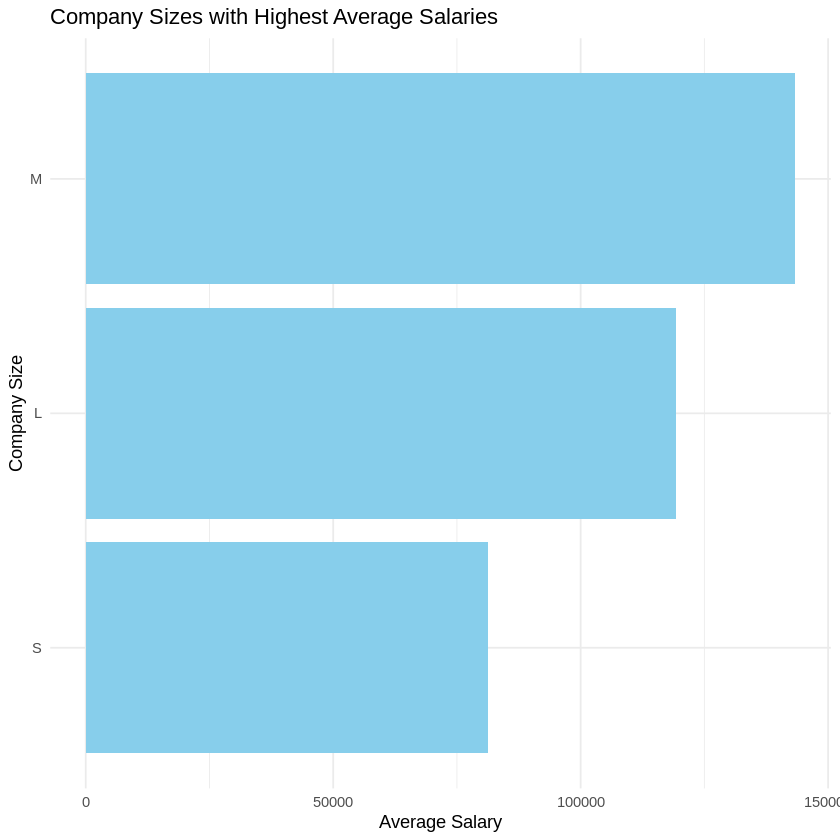

In [182]:
ggplot(salary_size, aes(x = reorder(company_size, Average_Salary), y = Average_Salary)) +
  geom_col(fill = "skyblue") +
  labs(title = "Company Sizes with Highest Average Salaries",
       x = "Company Size",
       y = "Average Salary") +
  coord_flip() +
  theme_minimal()

Employees who work at **medium** sized companies have the *highest* average salary, and who work at **small** sized companies have the *lowest* average salary.

### **Work Year**



I'd like to find trends in salaries over the years.

In [183]:
salary_year <- salarydata %>%
  group_by(work_year) %>%
  summarise(Average_Salary = mean(salary_in_usd, na.rm = TRUE))

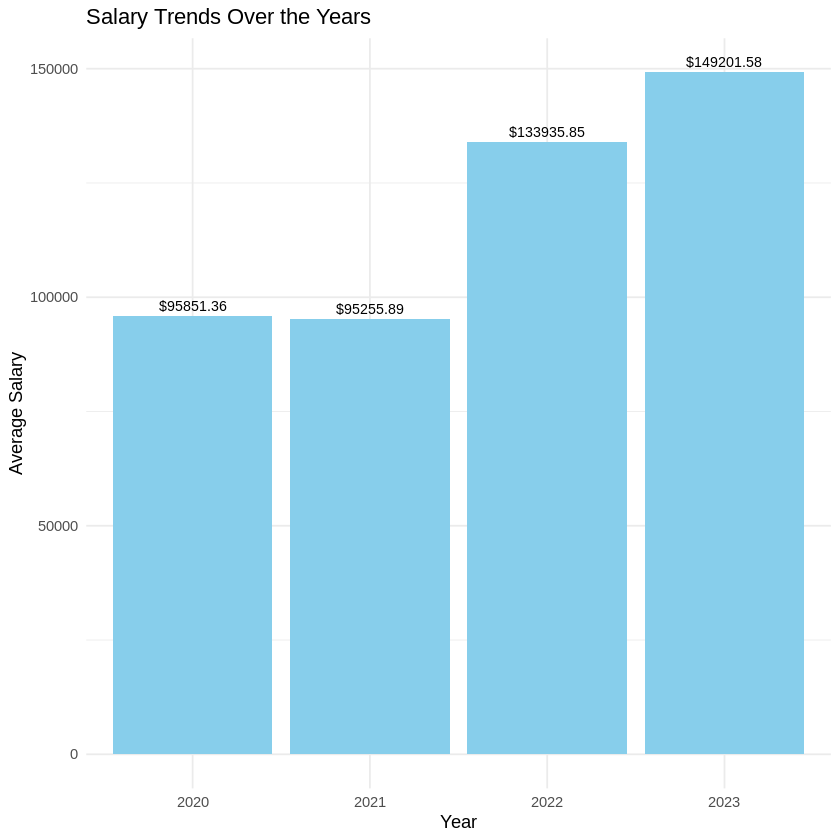

In [184]:
ggplot(salary_year, aes(x = as.factor(work_year), y = Average_Salary)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  geom_text(aes(label = sprintf("$%.2f", Average_Salary)), vjust = -0.5, size = 3, color = "black") +
  labs(title = "Salary Trends Over the Years",
       x = "Year",
       y = "Average Salary") +
  theme_minimal()

From 2020 to 2021, the average salary dropped by 595.47.

["2021 has been a year with a lot of disruption and change due to impact of covid, including in the data engineering space. In addition to COVID-19’s impact on the hiring market (and economy at large)..."](https://artecha.com/impact-of-covid/)

Due to the impact of COVID-19, it is reasonable to assume that the average salary has dropped due to disruption and change.

On the other hand, we can see steady increase from year 2021 to 2022, and 2022 to 2023. It is reasonable to assume that the average salary for jobs in data science field will be increasing in the future.

## ***Limitations***

### **1. Employment Type**

The reported full-time salary might have been internship roles, which was why some of the data were reported as low.

I deleted outlier data in order to elevate the accuracy representation in the data cleaning process, however it would have been better if the data included the status of the job: whether it’s full-time job or internship in full-time employment type column.

### **2. Countries & Currency Conversion**

In the data cleaning process, I have mentioned about countries with lower average salaries for data science jobs.

The analysis might have been more accurate if I only combined data other than those countries as they may be considered as outliers for the overall result.

Also, currency conversion might not accurately reflect the real-time exchange rates or purchasing power parity, affecting cross-country salary comparisons.

### **3. Biased Data & Limited Context**

The dataset might not represent all regions, job titles, or employment types equally. These biased data can skew conclusions.

Plus, lack of additional context, such as job responsibilities, years of experience, or educational qualifications, could limit the depth of analysis.

### **4. Job Title Variations**

Job titles might vary across countries or companies, making direct comparisons challenging. An ambiguous job title might encompass different roles and responsibilities.

To take data scientist for instance, there were various job titles that can be considered as data scientist jobs, such as Applied Data Scientist, Director of Data Science, Principal Data Scientist, and so on. The analysis might have shown higher accuracy if the variation in job titles were less than 10.